In [20]:
from helper import *
from data import *
from models import *

%matplotlib inline 
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 

pd.set_option('display.max_rows', 100)    
pd.set_option('display.max_colwidth', 100)    

%load_ext autoreload
%autoreload 2


data_path = os.getcwd() + "/data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DATA

In [21]:
kb_file = os.path.join(data_path,'kb_question.csv')
if os.path.exists(kb_file):
    kb_question = pd.read_csv(kb_file)
else:
    kb_question = read_kb(data_path)
    kb_question.to_csv(kb_file , index=False, encoding='utf-8-sig')

In [22]:
display(kb_question.sample(n=100))

,question,code,code2
28097,我 买 8袋 洗衣粉 只有 给 发货 4袋 能 退换货 我 货款,1267,109
8541,给我 注销 任性付 账号 冻结 我 不 用,1021,174
7944,任性付 问时间 提前 结 清,207,174
6451,问时间 到 货 可是 没有 发票,989,146
30017,我 易付宝 银行卡 被 盗用 怎么 处理,736,145
9369,我 任性付 被 冻结 赶紧 解冻,594,174
4858,我 到 问地点 写 错 选 我 公司 问地点 现在 能 更改,1087,91
22168,618 不是 优惠,654,42
2490,信速融 贷款 发放 到 问地点 放款 速度 快,242,149
16022,最 大 规模 是否 有 限制,808,110


In [23]:
train, dev, test = np.split(kb_question.sample(frac=1), [int(.8*len(kb_question)), int(.9*len(kb_question))])

In [24]:
if not os.path.exists(os.path.join(data_path,'train.csv')):
    train_df = create_pair_data(train)
    train_df.to_csv(os.path.join(data_path,'train.csv'), index=False, header=False, encoding='utf_8_sig')
else:
    train_df = pd.read_csv(os.path.join(data_path,'train.csv'), header=None)
    train_df.columns = ['s1', 's2', 'score']
    
if not os.path.exists(os.path.join(data_path,'dev.csv')):
    dev_df = create_pair_data(dev)
    dev_df.to_csv(os.path.join(data_path,'dev.csv'), index=False, header=False, encoding='utf_8_sig')
else:
    dev_df = pd.read_csv(os.path.join(data_path,'dev.csv'), header=None)
    dev_df.columns = ['s1', 's2', 'score']
    
if not os.path.exists(os.path.join(data_path,'test.csv')):
    test_df = create_pair_data(test)
    test_df.to_csv(os.path.join(data_path,'test.csv'), index=False, header=False, encoding='utf_8_sig')
else:
    test_df = pd.read_csv(os.path.join(data_path,'test.csv'), header=None)
    test_df.columns = ['s1', 's2', 'score']

In [25]:
def convert(x):
    if x==0:
        return 0
    if x==3:
        return 1
    if x==5:
        return 2
train_df['score'] = train_df['score'].apply(lambda x: convert(x) )

In [26]:
train, dev, test = get_nl(data_path)

processing /home/tingchunyeh/Sentence_sim/data/train.csv ...
** TRAIN DATA : Found 1059825 pairs of train sentences.
processing /home/tingchunyeh/Sentence_sim/data/dev.csv ...
** DEV DATA : Found 120200 pairs of dev sentences.
processing /home/tingchunyeh/Sentence_sim/data/test.csv ...
** TEST DATA : Found 120318 pairs of test sentences.


In [27]:
txt = np.append(train['s1'], train['s2'])

In [28]:
wv, default_wv = build_vocab(txt, "w2v-model.txt")

Found (5190/5759) words with w2v vectors
vocab size: 5759


In [29]:
test_vec1 = "苏宁 易 购 所 出售 的 商品 均 为 正品 行货 均 来自 正规 渠道 带 正规 机 打 发票 享受 国家 三 包 服务 质量 和 售后 服务 与 门店 完全 相同 请您 放心 选购"
test_vec2 =  "苏宁 易 购 所 出售 的 商品 均 为 正品 行货 请您 放心 选购"
test_vec3 = "有 统一 的 全 国 售后 服务 正品 质量 保证"
test_vec4 = "所有 货物 都 是 正品 请 安心 购买"
test_vec5 = "正规 发票 服务 完全 相同 放心 享受 服务"

## TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [13]:
def TF_IDF_train(txt, min_df=5):
    tf = TfidfVectorizer(norm=None,  min_df=min_df)
    txt_fitted = tf.fit(txt)
#     txt_transformed = txt_fitted.transform(txt)
    idf = dict(zip(txt_fitted.get_feature_names(), tf.idf_))
    
#     feature_names = np.array(tf.get_feature_names())
#     sorted_by_idf = np.argsort(tf.idf_)
#     print("Features with lowest idf:\n{}".format(
#            feature_names[sorted_by_idf[:10]]))
#     print("\nFeatures with highest idf:\n{}".format(
#            feature_names[sorted_by_idf[-10:]]))
    
    return txt_fitted, idf

In [14]:
def TF_IDF_predict(s1, s2):
    tfidf1 = txt_fitted.transform([s1])
    tfidf2 = txt_fitted.transform([s2])
    return cosine_similarity(tfidf1, tfidf2)[0][0]

In [12]:
txt_fitted, idf = TF_IDF_train(txt)
print("Vocabulary size: {}".format(len(idf)))

Vocabulary size: 4814


In [15]:
print(TF_IDF_predict(test_vec1, test_vec2))
print(TF_IDF_predict(test_vec1, test_vec3))
print(TF_IDF_predict(test_vec1, test_vec4))
print(TF_IDF_predict(test_vec1, test_vec5))

0.564063288478027
0.3280959982172061
0.08927000153673949
0.7154883451720517


## Avg word embedding

In [15]:
def avg_embedding(sentence):
    res = np.zeros(300)
    count = 0
    for w in sentence.split():
        cur = wv[w] if w in wv else default_wv
        res = np.add(res, cur)
        count += 1
    return res/count

In [16]:
def avg_embedding_predict(s1, s2):
    avg_embed1 = avg_embedding(s1)
    avg_embed2 = avg_embedding(s2)
    return cosine_similarity([avg_embed1], [avg_embed2])[0][0]

In [18]:
print(avg_embedding_predict(test_vec1, test_vec2))
print(avg_embedding_predict(test_vec1, test_vec3))
print(avg_embedding_predict(test_vec1, test_vec4))
print(avg_embedding_predict(test_vec1, test_vec5))

0.7395119383804422
0.7702494397958288
0.5822902152174465
0.8050550336647121


## IDF word embedding

In [17]:
def IDF_embedding(sentence):
    res = np.zeros(300)
    count = 0
    for w in sentence.split():
        if w in wv:
            cur = wv[w]*idf[w] if w in idf else wv[w] 
        else:
            cur = default_wv
        res = np.add(res, cur)
        count += 1
    return res/count

In [18]:
def IDF_embedding_predict(s1, s2):
    IDF_embed1 = IDF_embedding(s1)
    IDF_embed2 = IDF_embedding(s2)
    return cosine_similarity([IDF_embed1], [IDF_embed2])[0][0]

In [21]:
print(IDF_embedding_predict(test_vec1, test_vec2))
print(IDF_embedding_predict(test_vec1, test_vec3))
print(IDF_embedding_predict(test_vec1, test_vec4))
print(IDF_embedding_predict(test_vec1, test_vec5))

0.7698741733717803
0.8521170473109053
0.6059862379190339
0.876640677199962


## Evaluation

In [30]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def predict(s1_ls, s2_ls, ptype='TF_IDF_predict'):
    preds = []
    for idx in tqdm(range(len(s1_ls))):
        s1, s2 = s1_ls[idx], s2_ls[idx]
        preds.append(eval(ptype)(s1, s2))
    return preds

def get_labels(preds, ths=[0.5, 0.7]):
    labels = []
    for pred in preds:
        if pred<ths[0]:
            labels.append(0)
        elif pred<ths[1]:
            labels.append(1)
        else:
            labels.append(2)
    return labels    
    
def eval_plot(pred_labels, true_labels):
    cnf_matrix = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2], title='Confusion matrix, without normalization')
#     plt.show()
    plt.subplot(1,2,2)
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2], title='Confusion matrix', normalize=True)
    plt.subplots_adjust(wspace = 0.2)
    plt.show()
    
val_acc_best = -1e10
adam_stop = False
stop_training = False

def evaluate(epoch, bsize = 64, eval_type='dev', final_eval=False):
    nli_net.eval()
    correct = 0.0
    global val_acc_best, lr, stop_training, adam_stop
    
    s1 = dev['s1'] if eval_type == 'dev' else test['s1']
    s2 = dev['s2'] if eval_type == 'dev' else test['s2']
    target = dev['label'] if eval_type == 'dev' else test['label']
    labels = np.array([])

    for i in tqdm(range(0, len(s1), bsize)):
        # prepare batch
        s1_batch, s1_len = get_batch(s1[i:i + bsize], wv, default_wv)
        s2_batch, s2_len = get_batch(s2[i:i + bsize], wv, default_wv)
        s1_batch, s2_batch = Variable(s1_batch.cuda()), Variable(s2_batch.cuda())
        tgt_batch = Variable(torch.LongTensor(target[i:i + bsize])).cuda()

        # model forward
        output = nli_net((s1_batch, s1_len), (s2_batch, s2_len))

        pred = output.data.max(1)[1]
        correct += pred.long().eq(tgt_batch.data.long()).cpu().sum().item()
        
        labels = np.append(labels, pred.cpu().data.numpy())

    # save model
    eval_acc = round(100 * correct / len(s1), 2)
    if final_eval:
        print('finalgrep : accuracy {0} : {1}'.format(eval_type, eval_acc))
    else:
        print('togrep : results : epoch {0} ; mean accuracy {1} :{2}'.format(epoch, eval_type, eval_acc))

    if eval_type == 'dev' and eval_acc > val_acc_best:
        print('saving model at epoch {0}'.format(epoch))
        if not os.path.exists("saved_model"): os.makedirs("saved_model")
        torch.save(nli_net.state_dict(), os.path.join("saved_model", "model_1"))
        val_acc_best = eval_acc

    return labels

def test_onePair(s1, s2):
    nli_net.eval()
    
    s1_batch, s1_len = get_batch(s1, wv, default_wv)
    s2_batch, s2_len = get_batch(s2, wv, default_wv)
    s1_batch, s2_batch = Variable(s1_batch.cuda()), Variable(s2_batch.cuda())

    # model forward
    output = nli_net((s1_batch, s1_len), (s2_batch, s2_len))
    pred = output.data.max(1)[1]
    return pred.item()

def score_onePair(s1, s2):
    nli_net.eval()
    
    s1_batch, s1_len = get_batch(s1, wv, default_wv)
    s2_batch, s2_len = get_batch(s2, wv, default_wv)
    s1_batch, s2_batch = Variable(s1_batch.cuda()), Variable(s2_batch.cuda())

    # model forward
    output = nli_net((s1_batch, s1_len), (s2_batch, s2_len))
    return output.cpu().data[0][2].item()

### TF-IDF

In [23]:
TFIDF_preds = predict(dev['s1'], dev['s2'])

100%|██████████| 120217/120217 [02:03<00:00, 977.02it/s]


overall accuracy: 0.6252110766364158


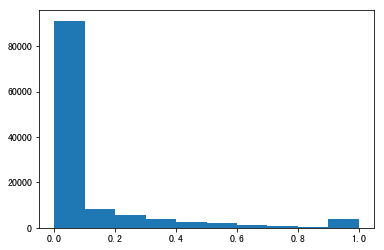

Confusion matrix, without normalization
[[59651   984  6225]
 [19134   468 12267]
 [ 6348    98 15042]]
Normalized confusion matrix
[[0.89217768 0.01471732 0.093105  ]
 [0.60039537 0.01468512 0.38491951]
 [0.2954207  0.00456069 0.70001862]]


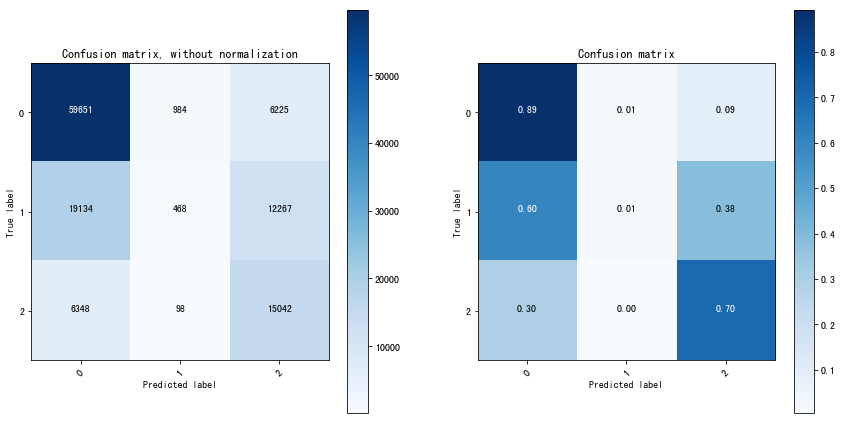

In [24]:
TFIDF_pred_labels = get_labels(TFIDF_preds, ths=[0.01, 0.05])
print("overall accuracy:", float(np.where(TFIDF_pred_labels==dev['label'])[0].shape[0])/len(TFIDF_pred_labels))
plt.figure()
plt.hist(TFIDF_preds)
plt.show()
eval_plot(TFIDF_pred_labels, dev['label'])

### avg word embedding

In [25]:
avg_embed_preds = predict(dev['s1'], dev['s2'], ptype="avg_embedding_predict")

100%|██████████| 120217/120217 [00:27<00:00, 4380.60it/s]


overall accuracy: 0.5329695467363185


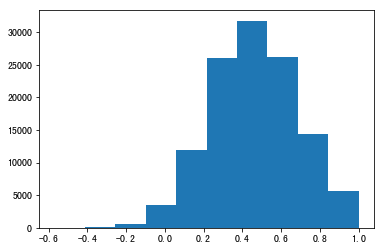

Confusion matrix, without normalization
[[37868 23236  5756]
 [ 8416 11144 12309]
 [ 1776  4652 15060]]
Normalized confusion matrix
[[0.56637751 0.34753216 0.08609034]
 [0.26408108 0.34968151 0.38623741]
 [0.08265078 0.21649293 0.70085629]]


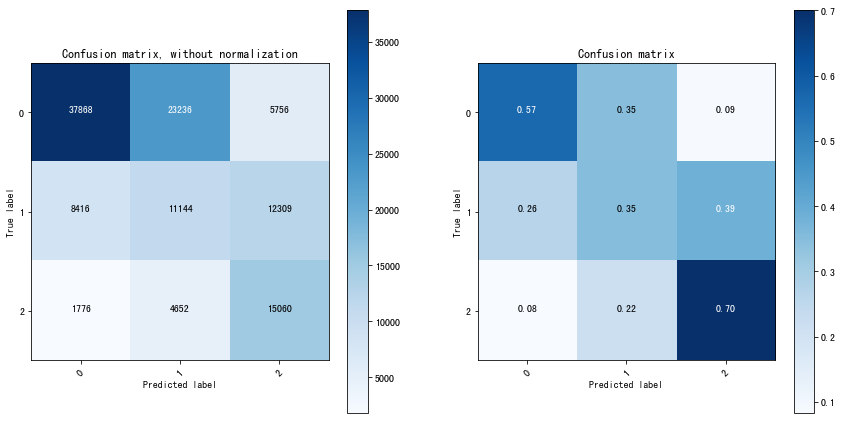

In [26]:
avg_embed_pred_labels = get_labels(avg_embed_preds, ths=[0.4, 0.6])
print("overall accuracy:", float(np.where(avg_embed_pred_labels==dev['label'])[0].shape[0])/len(avg_embed_pred_labels))
plt.figure()
plt.hist(avg_embed_preds)
plt.show()
eval_plot(avg_embed_pred_labels, dev['label'])

### IDF word embedding

In [27]:
IDF_embed_preds = predict(dev['s1'], dev['s2'], ptype="IDF_embedding_predict")

100%|██████████| 120217/120217 [00:31<00:00, 3874.93it/s]


0.5478260146235557


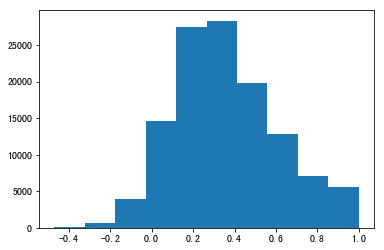

Confusion matrix, without normalization
[[43116 11998 11746]
 [ 8686  5219 17964]
 [ 2069  1896 17523]]
Normalized confusion matrix
[[0.64486988 0.1794496  0.17568053]
 [0.27255326 0.16376416 0.56368258]
 [0.0962863  0.08823529 0.81547841]]


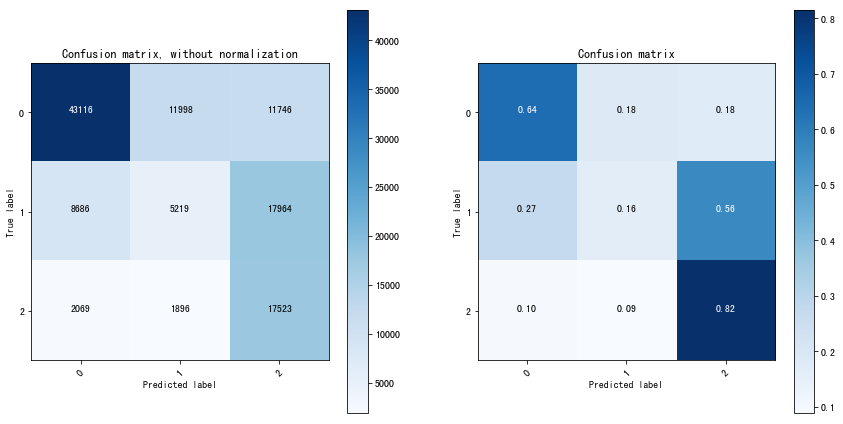

In [28]:
IDF_embed_pred_labels = get_labels(IDF_embed_preds, ths=[0.3, 0.4])
print( float(np.where(IDF_embed_pred_labels==dev['label'])[0].shape[0])/len(IDF_embed_pred_labels))
plt.figure()
plt.hist(IDF_embed_preds)
plt.show()
eval_plot(IDF_embed_pred_labels, dev['label'])

### InferSent

In [31]:
config_nli_model = {
    'n_words'        :  len(wv),
    'word_emb_dim'   :  300,
    'enc_lstm_dim'   :  512,
    'num_layer'   :  1,
    'dpout_model'    :  0,
    'dpout_fc'       :  0.3,
    'fc_dim'         :  256,
    'bsize'          :  64,
    'n_classes'      :  3,
    'pool_type'      :  'max',
    'encoder_type'   :  'GRUEncoder',
    'use_cuda'       :  True,
}

In [32]:
torch.cuda.set_device(0)
np.random.seed(10)
torch.manual_seed(10)
torch.cuda.manual_seed(10)

In [33]:
from models import *
nli_net = NLINet(config_nli_model)
nli_net.load_state_dict(torch.load(os.path.join("saved_model", "model_new")))
nli_net.cuda()
print(nli_net)

NLINet(
  (encoder): GRUEncoder(
    (enc_lstm): GRU(300, 512, bidirectional=True)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.3)
    (1): Linear(in_features=4096, out_features=256, bias=True)
    (2): Tanh()
    (3): Dropout(p=0.3)
    (4): Linear(in_features=256, out_features=3, bias=True)
    (5): Softmax()
  )
)


In [40]:
eval_labels = evaluate(0, bsize = 64, eval_type='dev', final_eval=False)

100%|██████████| 1703/1703 [01:07<00:00, 25.39it/s]

togrep : results : epoch 0 ; mean accuracy dev :81.35
saving model at epoch 0


0.813537230136584
Confusion matrix, without normalization
[[52893  6124   823]
 [ 1789 18751  7833]
 [  644  3101 16986]]
Normalized confusion matrix
[[0.88390709 0.10233957 0.01375334]
 [0.0630529  0.66087478 0.27607232]
 [0.03106459 0.14958275 0.81935266]]


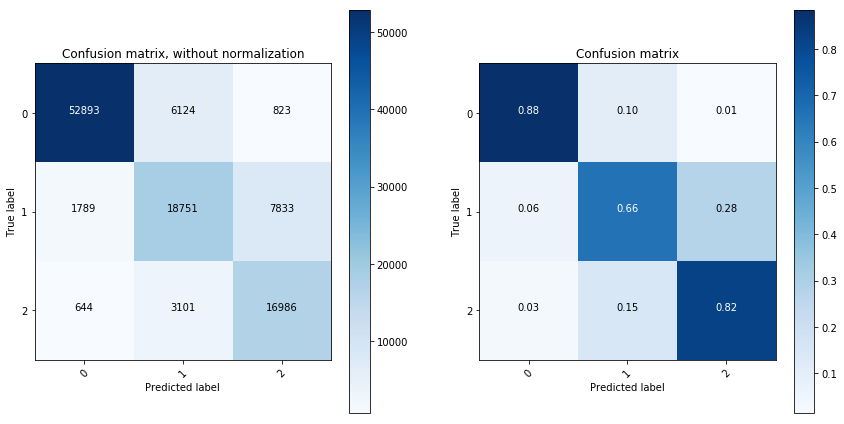

In [41]:
print( float(np.where(eval_labels==dev['label'])[0].shape[0])/len(eval_labels))
eval_plot(eval_labels, dev['label'])

## Error Analysis

In [18]:
train_df = pd.DataFrame(train)

In [401]:
inds = np.where((eval_labels==2) & (dev['label']==2))[0]
for ind in inds:
    print(dev['s1'][ind],"  ", dev['s2'][ind])

没有 看到 发票 下载 的 按钮    电子 发票 下载 的 地址 在 哪里
没有 看到 发票 下载 的 按钮    怎么 没有 下载 发票
没有 看到 发票 下载 的 按钮    电子 发票 下载 的 链接 是 什么
没有 看到 发票 下载 的 按钮    我 找 不 到 下载 电子 发票 的 啊
没有 看到 发票 下载 的 按钮    什么 时候 显示 电子 发票 内容
我 没有 找到 股东券    我 没有 找到 股东券
空调 不 制冷    上 周 只有 1 条 今天 开 电脑 居然 出现 了 4 条
空调 不 制冷    手机 屏幕 失灵 没 反应
是 不 是 能改 别的 支付 方式    是 不 是 能改 别的 支付 方式
请 问 我 购买 的 这 款 产品 是 从 成都 发货 过来 吗    查询 发货 地址
请 问 我 购买 的 这 款 产品 是 从 成都 发货 过来 吗    是 在 那里 发货
请 问 我 购买 的 这 款 产品 是 从 成都 发货 过来 吗    是 从 北京 发货 吗
请 问 我 购买 的 这 款 产品 是 从 成都 发货 过来 吗    优惠 品是 从 哪里 发货 的
什么 时候 退款 到 账呢    已 申请 退货 货款 什么 时间 到 帐
什么 时候 退款 到 账呢    申请 退款 什么 时候 可以 到账
什么 时候 退款 到 账呢    退款 没 收到
什么 时候 退款 到 账呢    请 问 取消 订单 后 我 付 的 款 什么 时候 到账
预售 抢购 到时 怎么 参加    商品 预约 后 马上 抢购么
预售 抢购 到时 怎么 参加    我 可以 参加 预售 活动么
预售 抢购 到时 怎么 参加    我 想 参加 预售 商品
预售 抢购 到时 怎么 参加    预售 抢购 到时 怎么 参加
意外 保 是 发生 意外 用 的 吗    意外 保 是 发生 意外 用 的 吗
我 昨天 零钱 宝 提现 的 到 现在 还 没 到账    我 今天 在 零钱 宝 提现 了 一 笔 钱 到 易 付 宝 余额 可是 一直 没到账
我 昨天 零钱 宝 提现 的 到 现在 还 没 到账    我 今天 早上 从 零钱 宝 转出 到 我 的 易付宝 现在 都 没到账
我 昨天 零钱 宝 提现 的 到 现在 还 没 到账    我

信用 贷借 不 了 钱    任性 贷放 款 失败
信用 贷借 不 了 钱    信用贷 可 用 额度 是 干嘛 的
信用 贷借 不 了 钱    给 了 2000 任 性贷 但是 没 地方 点击 贷款
你们 的 商品 是 不 是 假货    你们 的 商品 是 不 是 假货
我 想 永久 冻结 任性 付 要 怎么办    请 冻结 任性 付
我 想 永久 冻结 任性 付 要 怎么办    注销 任性 付 帐号
我 想 永久 冻结 任性 付 要 怎么办    您 好 我 希望 能 永久 冻结 任性 付
我 想 永久 冻结 任性 付 要 怎么办    太低 了 能 不 能 注销 这个 任性 付的
我 想 永久 冻结 任性 付 要 怎么办    任性 付 可以 关闭 或 注销 吗
如何 参加 满 2 件 5 折 的 活动    如何 参加 满 2 件 5 折 的 活动
如何 参加 满 2 件 5 折 的 活动    要 怎么 参加 满 2 件 5 折 的 活动
易玺 使用 是否 有 限制 能否 使用 多个 账户    易玺 使用 有 没 有 限制 能 不 能 使用 多个 账户
易玺 使用 是否 有 限制 能否 使用 多个 账户    易玺 使用 是否 有 限制 能否 使用 多个 账户
你 好 我 买了 5S 没收 到 前 可以 退货 吗    嗯 呢 给 我 换 吧
你 好 我 买了 5S 没收 到 前 可以 退货 吗    鞋子 385 的 大 太 多 了 我 看 库存 有 一 双 365 的 可以 换 给 我 吗
你 好 我 买了 5S 没收 到 前 可以 退货 吗    买的 诺基亚 n1 要 申请 换货
你 好 我 买了 5S 没收 到 前 可以 退货 吗    不要 了 退货
冲 的 话费 怎么 还 没 到账    我 充值 的 话费 还 没有 到账 帮忙 查询 一下
冲 的 话费 怎么 还 没 到账    我 今天 中午 充的话 费钱 扣 了 没到账
冲 的 话费 怎么 还 没 到账    客服 你 好 为什么 早上 7点40多 冲 话费 现在 还 没 到账
冲 的 话费 怎么 还 没 到账    话费 充值 多久 到账
冲 的 话费 怎么 还 没 到账    交了 流量 费用 为什么 15 分钟 过去 了 还没 到账
快递 没有 给我 提前 打 电话 到 

实名 认证 后 15 元 的 券 没有 到唉    我 昨天 实名 注册 的 会员 优惠券 怎么 还 不 到位 呢
实名 认证 后 15 元 的 券 没有 到唉    实名 给 优惠券 我 刚刚 实名 认证 了 为什么 没 给我
本 以为 今天 下午 可以 收到 的    请 问 现在 拍下 什麽 时候 可以 到
本 以为 今天 下午 可以 收到 的    我 兑换 的 小狮子 什么 时候 发货
本 以为 今天 下午 可以 收到 的    我 下 的 单 还 没 发货 吗 一般 不 是 第二 天 就 到 的 吗
本 以为 今天 下午 可以 收到 的    本 以为 今天 下午 可以 收到 的
麻烦 给 我 一 个 安装 的 联系 电话 谢谢    没有 工作 人员 安装 吗
麻烦 给 我 一 个 安装 的 联系 电话 谢谢    安装 时 你们 会 联系 我妈
麻烦 给 我 一 个 安装 的 联系 电话 谢谢    上门 安装 电视 拨打 哪个 电话
麻烦 给 我 一 个 安装 的 联系 电话 谢谢    帮我 安排 下 安装
新 注册 用户 没有 优惠 么    新 注册 用户 没有 优惠 么
新 注册 用户 没有 优惠 么    新 用户 的 优惠券 在哪
现在 从 易付宝 转账 到 银行卡 需 多长 时间 能到账    转账 信息 填错 了 能 撤销 吗
现在 从 易付宝 转账 到 银行卡 需 多长 时间 能到账    你 好 请问 我 转账 的 钱 为什么 没到 账呢
现在 从 易付宝 转账 到 银行卡 需 多长 时间 能到账    您 好 我 上午 转账 一 笔 钱 到 民生 银行 可是 到 现在 都 没有 到账
现在 从 易付宝 转账 到 银行卡 需 多长 时间 能到账    易付宝 转账 显示 成功 怎么 没到 账啊
现在 从 易付宝 转账 到 银行卡 需 多长 时间 能到账    转账 没 到 账
任性 付 在哪 还款    任性 付 在哪 还款
任性 付 在哪 还款    银行卡 自动 还款 是吗
任性 付 在哪 还款    任性 付 分期 之后 怎么 还款
任性 付 在哪 还款    使用 任性 付 立刻 还款 吗
任性 付 在哪 还款    任性 付 今天 买 什么 时候 还款
是的 那个 榨汁机 优惠券 还没 收到    我的易购券 怎么 还

我 人脸 识别 老是 失败    人脸 识别 怎么 提示 公安 网 无 基准 照片
我 人脸 识别 老是 失败    然后 一直 刷脸 验证 一直 验证 失败 是 什么 情况
我 人脸 识别 老是 失败    你 好 任性 付 人脸 识别 怎么 没 有用
免费 试用 要 怎么 参加 的    免费 试用 要 怎么 参加 的
结果 我 前天 买 昨天 就 给 我 直 降 100 元    我 是 说 退 差价
结果 我 前天 买 昨天 就 给 我 直 降 100 元    这 没 几 天 就 降价 了 我 要 退 差价
结果 我 前天 买 昨天 就 给 我 直 降 100 元    怎么 还 不到 一 个 月 就 降价 了
结果 我 前天 买 昨天 就 给 我 直 降 100 元    你 好 为什么 我 收到 一 天 就 降价
可以 付 现金 吗    货到 付款 必须 现金 吗
可以 付 现金 吗    到货 后 我 就 给 现金 吗
可以 付 现金 吗    这个 是 支持 货到 付款 的 吗
可以 付 现金 吗    只 能 用 现金 到 付吗
北京 节能 补贴 什么 时候 开始 的    北京 节能 补贴 什么 时候 开始 的
厂家 来 维修 贵 不贵    手机 掉 地上 了 能 维修 吗
厂家 来 维修 贵 不贵    海信 空调 维修费 多少
厂家 来 维修 贵 不贵    我 还 在 保呢 不 收 我 维修费 吧
为什么 我 的 任性 贷 额度 没了    为什么 我 的 任性 贷 账户 没有 可消费 的 额度 了
为什么 我 的 任性 贷 额度 没了    我的 任性 贷 额度 没有 了
为什么 我 的 任性 贷 额度 没了    任性 贷冻结 了 能 解封 不
为什么 我 的 任性 贷 额度 没了    为什么 任性 贷 额度 看 不 到了
为什么 我 的 任性 贷 额度 没了    我 任性 贷 额度 被 冻结 了
能 不 能 当天 送来 就 安装    送货 安装 同时 进行 吗
能 不 能 当天 送来 就 安装    能 不 能 当天 送来 就 安装
热水器 送货 后 就 能 安装 吗    我 要 安装 找谁
热水器 送货 后 就 能 安装 吗    我 下单 时 不 是 就 预约 安装 了
热水器 送货 后 就 能 安装 吗    麻烦

微波炉 插上 电源 转动 时间 完全 没 反应    电视 才 买 几 个 月 就 出现 问题 了
我的 发票 还 没来    为什么 我 的 手机 没有 发票
我的 发票 还 没来    我 想 问 下 我 的 发票 开了 没有
出于 安全 考量 希望 能 帮忙 注销 一下 任性 付    任性 付 我 要 注销 下
出于 安全 考量 希望 能 帮忙 注销 一下 任性 付    麻烦 把 任性 付 冻结 一下
出于 安全 考量 希望 能 帮忙 注销 一下 任性 付    任性 付 不 欠款 能否 注销
信用 现金 贷有 额度 怎么 贷不了    信用 贷借 不 了 钱
信用 现金 贷有 额度 怎么 贷不了    任性 贷借 款 为什么 总是 显示 系统 繁忙
信用 现金 贷有 额度 怎么 贷不了    任性 贷暂 时 无法 进行 借款 操作 是 什么 意思
信用 现金 贷有 额度 怎么 贷不了    任性 贷 可以 提现 吗
信用 现金 贷有 额度 怎么 贷不了    任性 贷借 款 为什么 总是 系统 繁忙
我 家里 是 集成 吊顶 你 这个 浴霸 合适 么    我 家里 是 集成 吊顶 你 这个 浴霸 合适 么
我 家里 是 集成 吊顶 你 这个 浴霸 合适 么    怎么 看 浴霸 是 不 是 适合 集成 吊顶
我 申请 冻结 了 任性 付 我 想 问问 什么 时候 才 能 申请 注销 账户    现在 我 要 注销 任性 付
我 申请 冻结 了 任性 付 我 想 问问 什么 时候 才 能 申请 注销 账户    任性 付 申请 冻结
我 申请 冻结 了 任性 付 我 想 问问 什么 时候 才 能 申请 注销 账户    预约 的 理财 一般 要 多久
我 申请 冻结 了 任性 付 我 想 问问 什么 时候 才 能 申请 注销 账户    你 好 我 想 注销 我 的 任性 付 账户
我 申请 冻结 了 任性 付 我 想 问问 什么 时候 才 能 申请 注销 账户    要求 必须 注销 任性 付
为什么 我 的 任性 贷 没有 成功 啊    为什么 我 的 任性 贷 没有 成功 啊
为什么 我 的 任性 贷 没有 成功 啊    任性 贷拒 绝 了 什么 时候 再 可以 申请
东西 送来 的 时候 包装 里面 没有 发票    发票 什么 时候 寄 出

还有 就是 怎么 注销 任性 付    能 不 能 帮我 申请 注销 任性 付 我 已经 把 所有 款项 已经 还清
早上 充值 100 话费 怎么 没 充上    客服 你 好 为什么 早上 7点40多 冲 话费 现在 还 没 到账
早上 充值 100 话费 怎么 没 充上    你 好 我 在 易 付 宝上充 值了 手机 话费 怎么 这么 久 了 还没 到账
早上 充值 100 话费 怎么 没 充上    我 上午 给 手机 充话费 系统 订单 显示 充值 成功 但是 手机 没有 收到 充值 短信
早上 充值 100 话费 怎么 没 充上    冲 的 话费 怎么 还 没 到账
早上 充值 100 话费 怎么 没 充上    你 好 我 交了 200 元 话费 充值 没到账
安排 工人 上门 维修 啊    我 之前 买 的 樱花 T95105 脱水机 坏 了 怎样 联系 维修
安排 工人 上门 维修 啊    跟 谁 预约 维修 啊
安排 工人 上门 维修 啊    你 好 此款 产品 怎么 保修
安排 工人 上门 维修 啊    你 好 之前 在 你们 那 买 的 手机 现在 黑屏 好烫 怎么 弄 都 没 反应
如果 没有 发票 保修 吗    如果 没有 发票 保修 吗
如果 没有 发票 保修 吗    手机 的 发票 丢了 维修 怎么办
如果 没有 发票 保修 吗    保修卡 找 不 到 了 能 不 能 保修
如果 没有 发票 保修 吗    我 在 苏宁 易 购买 的 随货 送来 的 发票 不 清楚 以后 能 保修 吗
如果 没有 发票 保修 吗    如果 发票 掉了 可以 报修 吗
那么 实体 店 发货 是 什么 快递    为什么 不 是 苏宁 快递 送货 而 是 圆通
增票 需要 多少 天 可以 重新 认证    增票 需要 多少 天 可以 重新 认证
增票 需要 多少 天 可以 重新 认证    增票 可以 重新 认证 修改 么
为什么 任性 付 不 能 充话费    为什么 任性 付冲 不 了 话费
为什么 任性 付 不 能 充话费    充话费 就 没 任性 付 付款 的
为什么 任性 付 不 能 充话费    为什么 我 不 能 用 任性 付充 话费
为什么 任性 付 不 能 充话费    任性 付充 话费 不 能 用
为什么 任性 

我 发票 上 的 校验码 在哪    哪里 可以 看 我 的 发票 校验码
我 发票 上 的 校验码 在哪    发票 验证 码 哪里 可以 看到
写的 几 点 就 是 几 点 送 吗    写的 几 点 就 是 几 点 送 吗
多 商标 注册证 品牌 名称 一样 但 经营 商品 范围 不同 上传 商标 注册 的 时候 怎么 处理    多 商标 注册证 品牌 名称 一样 但 经营 商品 范围 不同 上传 商标 注册 的 时候 怎么 处理
为什么 领 不 了 优惠券    为什么 领 不 了 优惠券
为什么 领 不 了 优惠券    无法 领券 为什么
为什么 领 不 了 优惠券    券领券 失败 了
没有 通知 我 就 直接 退货 了 你们 解释 下    收货 没有 验货 的么
没有 通知 我 就 直接 退货 了 你们 解释 下    师傅 不 给 我 送到 指定 的 地方 呢
半 月 之内 可以 补差 价 吗    买贵 就 买贵 了
半 月 之内 可以 补差 价 吗    结果 我 前天 买 昨天 就 给 我 直 降 100 元
半 月 之内 可以 补差 价 吗    一 个 星期 都 不到 就 降价 了
现在 信用贷 为什么 不 能 用了    为什么 任性 贷的 信用 贷款 操作 不了
现在 信用贷 为什么 不 能 用了    你 好 最近 任性 贷 提示 系统 繁忙 是 怎么 回 事
现在 信用贷 为什么 不 能 用了    任性 贷有 额度 为什么 会 借 不到
现在 信用贷 为什么 不 能 用了    信用 贷款 提示 系统 繁忙
我 买 了 两 台 空调 想问 下 安装 咋 收费 的 呀    上面 写 的 同 一 个 地点 安装费 最 多 收 200
我 买 了 两 台 空调 想问 下 安装 咋 收费 的 呀    回风 管 加长 怎么 收费
我 买 了 两 台 空调 想问 下 安装 咋 收费 的 呀    不是说 你们 不 收 安装 费么
我 买 了 两 台 空调 想问 下 安装 咋 收费 的 呀    安装 的 时候 什么 需要 收费
我 买 了 两 台 空调 想问 下 安装 咋 收费 的 呀    安装费 怎么办
电视 才 买 几 个 月 就 出现 问题 了    安排 工人 上门 维修 啊
电视 才 买 几 个 月 就 出现 问题 了

不 配送 呢 可以 自提 吗    现在 不 想 自提 了 能改 吗
不 配送 呢 可以 自提 吗    自提改 配送 怎么 不 能 操作
不 配送 呢 可以 自提 吗    为什么 不 能改 配送 方式
我们 平时 看 万分 收益 还是 年 化 收益    我们 平时 看 万分 收益 还是 年 化 收益
你 能 跟我 说 下 什么 是 安心 保 吗    你 能 跟我 说 下 什么 是 安心 保 吗
你们 可 不 可以 再 优惠 了    电视 有 什么 优惠
你们 可 不 可以 再 优惠 了    我 买的 手机 能不能 便宜 点
我的 预期 收益 通过 什么 标准 算    我的 预期 收益 通过 什么 标准 算
都 是 几 月份 的    什么 叫 日期 不新鲜
都 是 几 月份 的    这个 日期 可以 变
都 是 几 月份 的    日期 新鲜 嘛
都 是 几 月份 的    日期 都 是 最新 的 吗
我 零钱 宝 转 钱 转 了 到 一 张 报废 的 卡里    为什么 零钱 宝 里面 的 钱 不 能 全 转到 建设 银行 上面 另外 一 张 卡 反而 可以
我 零钱 宝 转 钱 转 了 到 一 张 报废 的 卡里    零钱 宝 里面 的 钱 为什么 不 能 全部 转出
我 零钱 宝 转 钱 转 了 到 一 张 报废 的 卡里    我 零钱 宝 转 钱 转 了 到 一 张 报废 的 卡里
话费 充错 了 能 退 吗    我 想 问 下 刚才 有 个 电话 充值 冲 错 了 如何 撤销 订单
话费 充错 了 能 退 吗    话费 充错 了 能 退 吗
话费 充错 了 能 退 吗    话费 充错 了 退款
话费 充错 了 能 退 吗    我 充值 流量 号码 错误 了 怎么办
话费 充错 了 能 退 吗    话费 充错 了 怎么办
交易 完 后 怎么 领 云 钻    打卡 说给 云 钻 2 天 了 怎么 还 没 到账
交易 完 后 怎么 领 云 钻    买 了 东西 为啥 不返 云钻
交易 完 后 怎么 领 云 钻    我 的 订单 怎么 没有 返 2 的 云钻
买 了 好多 东西 现在 怎么 又 一样 没到 呢    错 送 或 漏 送 东西 怎么办
买 了 好多 东西 现在 怎么 又 一样 没到 呢    买 了 三 样 东西 

怎么 更换 申请 的 易付宝 实名 验证    怎么 解除 易 付 宝 身份证 绑定
两 天 前 刚刚 买的 6 s 今天 只要 4665 能 补差 价 不    万一 便宜 补差 价 吗
两 天 前 刚刚 买的 6 s 今天 只要 4665 能 补差 价 不    今天 就 比 昨天 便宜 100
定金 团 商品 如何 支付 定金    定金 团 商品 如何 支付 定金
定金 团 商品 如何 支付 定金    支付 定金 能 不 能 使用 苏宁卡
中国 大陆 没有 注册 商标 的 品牌 是否 可以 入驻 苏宁    品牌 在 中国 大陆 没有 注册 商标 还 能 入驻 苏宁吗
中国 大陆 没有 注册 商标 的 品牌 是否 可以 入驻 苏宁    中国 大陆 没有 注册 商标 的 品牌 是否 可以 入驻 苏宁
中国 大陆 没有 注册 商标 的 品牌 是否 可以 入驻 苏宁    品牌 在 中国 大陆 没有 注册 商标 入驻 苏宁 时有 什么 障碍 吗
任性 付 无法 注销    想 注销 任性 付
任性 付 无法 注销    任性 付 无法 注销
任性 付 无法 注销    任性 付 怎么 注销
任性 付 无法 注销    我 需要 冻结 任性 付 这个
任性 付 无法 注销    任性 付 不 怎么 用 了 可以 冻结 吗
我 这个 商品 使用 的 什么 物流    那么 实体 店 发货 是 什么 快递
我 这个 商品 使用 的 什么 物流    你们 是 委托 第三 方 快递 吗
我 这个 商品 使用 的 什么 物流    你们 是 自己 的 送货员 还是 其它 快递
我 这个 商品 使用 的 什么 物流    我 这个 订单 是 苏宁 自己 送货 吗
我 充值 的 话费 还 没有 到账 帮忙 查询 一下    流量 充值 没有 到账
我 充值 的 话费 还 没有 到账 帮忙 查询 一下    为什么 我 话费 充值 没有 到
我 充值 的 话费 还 没有 到账 帮忙 查询 一下    我 上午 充话费 30 为啥 没有 到账
我 充值 的 话费 还 没有 到账 帮忙 查询 一下    我 手机 话费 充值 未 到 帐 什么 情况
我 充值 的 话费 还 没有 到账 帮忙 查询 一下    我 今天 中午 充的话 费钱 扣 了 没到账
是 不 是 第一 次 用完

下面 的 乡镇 可以 到 吗    物流 能到 香格里拉 吗
我 请假 在家 等 了 一 天 为什么 没 人 来    我 家 空调 现在 还 没 装
我 请假 在家 等 了 一 天 为什么 没 人 来    我 请假 在家 等 了 一 天 为什么 没 人 来
任性 付 是 什么    任性 付 是 什么
请 问 我 怎么 查看 下 推广 收益 情况    请 问 我 怎么 查看 下 推广 收益 情况
为什么 有些 商品 不 支持 货到 付款 呢    送到 支付 只 能 付现 金吗
为什么 有些 商品 不 支持 货到 付款 呢    为什么 有些 商品 不 支持 货到 付款 呢
为什么 有些 商品 不 支持 货到 付款 呢    能 到货 付 吗
为什么 有些 商品 不 支持 货到 付款 呢    我 也 可以 货到 付款 是 吧
实名 的 优惠券 还 没 到账    昨天 我 完成 了 注册 并 完成 了 实名 认证 绑卡 但是 没有 发放 优惠券
实名 的 优惠券 还 没 到账    我 做完 实名 认证 可是 没有 领到 15 元券
实名 的 优惠券 还 没 到账    我 刚 看到 有 实名 认证 绑定 银行卡 赠 优惠券 的 活动 我 就 实名 绑 定了 没到 帐啊
实名 的 优惠券 还 没 到账    为什么 我 绑 定了 没有 优惠券
快递 电话 发 一下    我 查 不到 货到 哪里 了 啊
快递 电话 发 一下    物 流到 哪里 了
为什么 任性 贷给 了 额度 又 不 成功    信用 贷款 提示 系统 繁忙
为什么 任性 贷给 了 额度 又 不 成功    任性贷 系统 提示 暂 不 提供 借款 操作
我的易购券 怎么 还 没 到账    我 已经 成功 付款 请问 说好 的 返还 券呢
我的易购券 怎么 还 没 到账    我 的 优惠券 没 返还 怎么办
我的易购券 怎么 还 没 到账    我 到 现在 还 没有 收到 10 元券
我的易购券 怎么 还 没 到账    领劵 没到账
我的易购券 怎么 还 没 到账    为什么 领 的 劵没 到 账啊
支持 无理由 退货 吗    要是 有 质量 问题 换机 在 哪里 换
支持 无理由 退货 吗    过 保 的 商品 还 能 退换 嘛
支持 无理由 退货 吗    苹果 手机 激

任性 贷借 款 还完 还 能 再 借 吗    那个 借款 我 怎 借 不 出来 了 呢 试 了 几 次 呢
易付宝 账户 被 锁去 哪里 解决    易付宝 账户 被 锁 如何 解决
易付宝 账户 被 锁去 哪里 解决    易付宝 账户 被 锁去 哪里 解决
我的 任性 付 欠款 已经 还清 需要 出示 我 欠款 还清 的 证明    为什么 我 的 任性 贷的 结清 证明 还没 发 邮件 给 我 呢
我的 任性 付 欠款 已经 还清 需要 出示 我 欠款 还清 的 证明    开 结 任性 付清 证明 流程 什么样的
我的 任性 付 欠款 已经 还清 需要 出示 我 欠款 还清 的 证明    我的 任性 付 欠款 已经 还清 需要 出示 我 欠款 还清 的 证明
我的 任性 付 欠款 已经 还清 需要 出示 我 欠款 还清 的 证明    我 还 要 出 个 任性 贷的 结清 证明
我 想 知道 固 收乐 享 和 渤享 为什么 提前    我 想 知道 固 收乐 享 和 渤享 为什么 提前
任性 付 购买 的 东西 的 范围    你 好 我 的 任性 付交 话费 怎么 不 能 用了 呀
任性 付 购买 的 东西 的 范围    为什么 我 用 任性 付充值 手机 话费 无法 充值 了 呢
任性 付 购买 的 东西 的 范围    充话费 就 没 任性 付 付款 的
任性 付 购买 的 东西 的 范围    充话费 怎么 不 能 用 任性 付
任性 付 购买 的 东西 的 范围    门店 可以 用 任性 付么
验货 时候 不 能 激活 怎么 看 是 不 是 正品    怎么 验货 怎样 检验 是否 是 行货 正品
不解决 让 315 帮 我了    只 能 求助 12315 了
我的 帐号 任性 付 冻结 了    请 问 这个 冻结 任性 付 什么 时候 能 解冻
任性 付 好久 可以 注销    请 帮我 把 任性 付 注销
任性 付 好久 可以 注销    麻烦 把 任性 付 冻结 一下
任性 付 好久 可以 注销    怎么 关闭 任性 付 怎么 注销 账号
任性 付 好久 可以 注销    注销 苏宁 帐号 任性 付 也 不 会 消失 吗
任性 付 好久 可以 注销    任性 付 我 也 要 注销
之前 网页 上 说 明天 能 送达 的    

任性 付 当前 存在 风险    任性 付 当前 存在 风险
任性 付 当前 存在 风险    任性 付 老是 说 该 订单 存在 风险
任性 付 当前 存在 风险    怎么 我 任性 付 提示 存在 风险
你们 明明 说 今天 已经 发 了 的    连 快递 单号 都 没有
你们 明明 说 今天 已经 发 了 的    帮我 看下 洗衣机 什么 时候 能送
你们 明明 说 今天 已经 发 了 的    我 下 的 单 还 没 发货 吗 一般 不 是 第二 天 就 到 的 吗
一般 如何 保修 呢    我 是 找 你们 维修 还是 找 厂家 呢
一般 如何 保修 呢    售后 服务 找谁 啊
一般 如何 保修 呢    我 这个 空调 坏 了 怎么 维修 啊
一般 如何 保修 呢    发现 质量 问题 怎么 修 呢
电子 发票 售后 认可 吗    电子 发票 售后 认可 吗
电子 发票 售后 认可 吗    用 电子 发票 可以 进行 售后 吧
电子 发票 售后 认可 吗    维修 可以 使用 电子 发票 吗
实名 认证 时 控股 股东 填 什么    实名 认证 时 控股 股东 填 什么
你们 能否 跟 任性 付 那边 沟通 下 我 想 注销 掉    您 好 我 要 冻结 我 的 任性 付
你们 能否 跟 任性 付 那边 沟通 下 我 想 注销 掉    为什么 我 预约 的 一直 没 成功
你们 能否 跟 任性 付 那边 沟通 下 我 想 注销 掉    你 好 开通 任性 付 的话 如果 以后 不 想 用 了 能 注销 吗 注销 了 会 不 会 产生 费用
你们 能否 跟 任性 付 那边 沟通 下 我 想 注销 掉    我 看到 提示 开通 任性 付 不 可 注销
你们 能否 跟 任性 付 那边 沟通 下 我 想 注销 掉    任性 付 怎么 冻结 啊
都到货 十 天 了 你们 还给 不给 安装    都到货 十 天 了 你们 还给 不给 安装
都到货 十 天 了 你们 还给 不给 安装    明天 再 不 来 安装 我 就 要 投诉 了
都到货 十 天 了 你们 还给 不给 安装    一直 没 人 联系 我 现在 告诉 我 他们 安装 不了
都到货 十 天 了 你们 还给 不给 安装    我的 东西 还 没 人 来 安装
都到货 十 

话费 充错 了 退款    我 刚才 话费 充值 错 了 号码 我 想 弄到 另 一 个 号码 上 可以 吗
话费 充错 了 退款    话费 充错 了 退款
这 款 手表 电话 是 苏宁 自营 商品 吗    是 你们 自营 还是 第三 方
这 款 手表 电话 是 苏宁 自营 商品 吗    这 款 手表 电话 是 苏宁 自营 商品 吗
这 款 手表 电话 是 苏宁 自营 商品 吗    怎么 才 算 苏宁 自营
这 款 手表 电话 是 苏宁 自营 商品 吗    是 苏宁 自营 的 吗
这 款 手表 电话 是 苏宁 自营 商品 吗    如何 区分 是 苏宁 自营 的 商品
苏宁租 机 到期 后 还 机还 需要 自己 付费 吗    苏宁租 机 到期 后 还 机还 需要 自己 付费 吗
网页 上 显示 是 今天 早上 到货 怎么 下午 又 改期    我 4 号 下 的 单 现在 反应 都 么有
网页 上 显示 是 今天 早上 到货 怎么 下午 又 改期    说是 今天 可以 收货 的 还 没到
什么 情况 下 安装 需要 收费 呢    电视 底座 调试 也 要 收费 吗
什么 情况 下 安装 需要 收费 呢    易 购买 的 热水器 安装 师傅 不 收费 吗
什么 情况 下 安装 需要 收费 呢    安装费 怎么办
什么 情况 下 安装 需要 收费 呢    不是说 你们 不 收 安装 费么
双 卡 双 待 单 通 可以 同时 接进 来 2 通 电话 么    双 卡 双 待 单 通 可以 同时 接进 来 2 通 电话 么
我 的 订单 是 包 安装 的 吧    厂家 安装 的 怎么 联系
我 的 订单 是 包 安装 的 吧    我 的 订单 是 包 安装 的 吧
我 的 订单 是 包 安装 的 吧    有 没 有 安装 服务 啊
今天 不 会 派送 吗    请 问 现在 拍下 什麽 时候 可以 到
任性 贷我 要 借款 点击 显示 帐号 不 存在 是 什么 意思    我 任性 贷借 钱 额度 有 我 点击 他 说 帐号 不 存在 是 什么 意思
任性 贷我 要 借款 点击 显示 帐号 不 存在 是 什么 意思    我 一点 还款 就是 任性贷 帐号 不 存在
任性 贷我 要 借款 点击 显示 帐号 不 存在 是 什么 意思    我 想 

麻烦 明天 早点 安排 过来 帮 我们 安装 啊    货 已经 收到 了 已经 安装 好了
麻烦 明天 早点 安排 过来 帮 我们 安装 啊    哪里 可以 约 明天 安装
麻烦 明天 早点 安排 过来 帮 我们 安装 啊    到时 安装 找谁
麻烦 明天 早点 安排 过来 帮 我们 安装 啊    你 看 一下 能 不 能 帮我 安排 明天 下午 安装
苏宁 自营 店发 什么 快递    你们 使用 什么 快递呢
苏宁 自营 店发 什么 快递    我 买 任何 快递
苏宁 自营 店发 什么 快递    你们 是 哪个 快递 寄的
苏宁 自营 店发 什么 快递    是 什么 物流 公司
苏宁 自营 店发 什么 快递    是 哪家 物流 公司
是 送货 上门 还是 自己 去取    师傅 只 送到 几 楼
是 送货 上门 还是 自己 去取    你们 的 送货 范围 是 哪些
是 送货 上门 还是 自己 去取    是 只 放在 家门口 吗
是 送货 上门 还是 自己 去取    没有 电梯 也 能送 吗
要 我 自己 打 电话 预约 安装 服务 吗    可以 把 按 装人 的 电话 给 我 吗
要 我 自己 打 电话 预约 安装 服务 吗    那 请问 空调 几时 才 能 上门 安装
要 我 自己 打 电话 预约 安装 服务 吗    你 看 一下 能 不 能 帮我 安排 明天 下午 安装
要 我 自己 打 电话 预约 安装 服务 吗    为啥 要 预约 师傅
零钱 宝 收益 怎么 计算    为什么 零 钱包 没有 收益
零钱 宝 收益 怎么 计算    零钱 宝 这个 钱 怎么 算 的 和 支付 宝 一样 吗
零钱 宝 收益 怎么 计算    零钱 宝 收益 怎么 计算
零钱 宝 收益 怎么 计算    零钱 宝 收益 何时 可以 显示
换 空调 需要 拆机费吗    换 空调 需要 拆机费吗
支付 定金 能 不 能 使用 苏宁卡    定金 团 商品 如何 支付 定金
支付 定金 能 不 能 使用 苏宁卡    支付 定金 能 不 能 使用 苏宁卡
出差 后 再 去 自提 可以 吗    自提 能 不 能 改下 收货 时间 呢
出差 后 再 去 自提 可以 吗    到了 自提点 的 订单 能 不 能 修改 取货 时间
出差 后 再 去 自提

你 好 请问 如何 注销 任性 付    为什么 我 预约 的 一直 没 成功
你 好 请问 如何 注销 任性 付    我 想 永久 冻结 任性 付 要 怎么办
你 好 请问 如何 注销 任性 付    如何 永久性 冻结 任性 付
你 好 请问 如何 注销 任性 付    帮我 冻结 下 任性 付
还是 这 一 套 那 就 315 见 吧    如果 苏宁 不 管我 就 投诉 315
还是 这 一 套 那 就 315 见 吧    所以 我 才 投诉 太 过分 玩 人
解释 一下 企业 商号    解释 一下 企业 商号
解释 一下 企业 商号    能 解释 一下 企业 商号 是 什么 吗
我的 任性贷 还款 点 不 进去 一点 进去 就是 账户 不 存在    任性 贷我 要 借款 点击 显示 帐号 不 存在 是 什么 意思
我的 任性贷 还款 点 不 进去 一点 进去 就是 账户 不 存在    我 任性 贷 帐号 不 存在
我的 任性贷 还款 点 不 进去 一点 进去 就是 账户 不 存在    我 任性 贷借 钱 额度 有 我 点击 他 说 帐号 不 存在 是 什么 意思
我的 任性贷 还款 点 不 进去 一点 进去 就是 账户 不 存在    显示 账号 不 存在 是 什么 意思
我的 任性贷 还款 点 不 进去 一点 进去 就是 账户 不 存在    账号 为什么 不 存在
怎么 使用 优酷 会员    你们 送 的 优酷 会员 我 用 不 上 怎么 回 事
怎么 使用 优酷 会员    怎么 使用 优酷 会员
手机 提供 代检 服务 吗    手机 提供 代检 服务 吗
零钱包 持有 额度 有 没 有 上限    零钱包 持有 额度 有 没 有 上限
退款 什么 时候 才 给 到账    申请 退款 什么 时候 可以 到账
退款 什么 时候 才 给 到账    那 重新 下单 · 我的款 能 马上 退 ·
退款 什么 时候 才 给 到账    退款 到 账后 有 短信 通知 吗
退款 什么 时候 才 给 到账    退款 没 收到
以前 的 订单 现在 查 不到 怎么 操作    为什么 看不到 以前 的 订单 了
以前 的 订单 现在 查 不到 怎么 操作    以前 的 订单 现在 查 不到 怎么 操作
我 都 订购 完成 了 你 和 我 说

安心 保 保障 金额 是 所有 的 都 免费 吗    安心 保 保障 不 就 是 维修 不 收 我 钱 吗
安心 保 保障 金额 是 所有 的 都 免费 吗    你们 这个 安心 保 是 怎么 收 维修费 的 啊
安心 保 保障 金额 是 所有 的 都 免费 吗    安心 保 保障 金额 是 所有 的 都 免费 吗
安心 保 保障 金额 是 所有 的 都 免费 吗    我 买 了 安心 保 维修 时 怎么 收费 呢
安心 保 保障 金额 是 所有 的 都 免费 吗    安心 保 到时候 维修 费用 怎么 算
我 昨天 实名 注册 的 会员 优惠券 怎么 还 不 到位 呢    我 已经 实名 了 为什么 15 元 易 购券 还没 发放
我 昨天 实名 注册 的 会员 优惠券 怎么 还 不 到位 呢    易付宝 实名 认证 15 元 的 券 在 哪里
我 昨天 实名 注册 的 会员 优惠券 怎么 还 不 到位 呢    实名 认证 没有 领券
是 用 苏宁卡 接收 不 到 验证 码    那 为什么 手机 收 不 到 验证 码
是 用 苏宁卡 接收 不 到 验证 码    是 用 苏宁卡 接收 不 到 验证 码
我的 任性 贷还款 未 逾期 怎么 还款 后 额度 为 0    任性 贷 额度 为 0 是 被 冻结 了 吗
我的 任性 贷还款 未 逾期 怎么 还款 后 额度 为 0    我的 任性贷 上面 金额 怎么 显示 为 0
我的 任性 贷还款 未 逾期 怎么 还款 后 额度 为 0    为何 我 的 任性 贷 额度 没有 了
我的 任性 贷还款 未 逾期 怎么 还款 后 额度 为 0    为什么 我 的 任性 贷还款 正常 有 没 有 逾期 为 社么 要 把 我 的 额度 取消
我的 任性 贷还款 未 逾期 怎么 还款 后 额度 为 0    你 好 我 的 任性 贷 因为 昨晚 还款 失败 逾期 一 天 就 给 冻结 了 吗
为什么 我 任性 付写 亲属 名字 和 电话 都 是 错的    你 好 怎么 开通 任性 付 老是 提示 联系人 电话 真实性 电话 号码 和 姓名 都 是 准确 的
为什么 我 任性 付写 亲属 名字 和 电话 都 是 错的    任性 付 总是 提示 我 输入 正确 的 联系人 姓名 和 手机号
为什么 我 任性 

还有 什么 投诉 渠道 吗    投诉 十 景斋 不 发货
还有 什么 投诉 渠道 吗    厂家 还是 没 上门 安装 能 帮我 投诉 下 吗
还有 什么 投诉 渠道 吗    你 好 怎么 投诉 送货 快递
还有 什么 投诉 渠道 吗    我 看您 也 别 仲裁 了 我 直接 工商局 投诉 得了
外置 WiFi 是 什么 意思    外置 WiFi 是 什么 意思
银行卡 自动 还款 是吗    银行卡 自动 还款 是吗
银行卡 自动 还款 是吗    使用 任性 付 立刻 还款 吗
过年 前 下单 过 完 年后 2 个 月 再 送货 可以 吗    不要 那么 早 送货 我 想 迟 一点 送货
过年 前 下单 过 完 年后 2 个 月 再 送货 可以 吗    我 刚 下 的 订单 改成 本 周日 送货 可以 吗
过年 前 下单 过 完 年后 2 个 月 再 送货 可以 吗    帮我 做 下 延期 收货
过年 前 下单 过 完 年后 2 个 月 再 送货 可以 吗    这个 订单 暂 不 送货 时间 待定
设置 了 委托 提现 规则 银行 账户 没有 在 规定 时间 收到 资金 转入 怎么办    设置 了 委托 提现 规则 银行 账户 没有 在 规定 时间 收到 资金 转入 怎么办
你们 是 哪个 快递 寄的    发票 是 走 哪家 快递
你们 是 哪个 快递 寄的    为什么 不 是 苏宁 快递 送货 而 是 圆通
你们 退货 什么 时候 能 处理 太 慢 了    您 好 退货 会 安排 了 师傅 上门 取货 吗
你们 退货 什么 时候 能 处理 太 慢 了    我 有点 着急 了 怎么 还 没 审核 完毕
你们 退货 什么 时候 能 处理 太 慢 了    请 问 退货 需要 几 日 能 处理 呢
你们 退货 什么 时候 能 处理 太 慢 了    我 刚才 申请 退货 能 把 师傅 电话 发给 我 吗 上门 取 件
请 问 下充 错 号码 了 可以 退回 来不    请 问 下充 错 号码 了 可以 退回 来不
请 问 下充 错 号码 了 可以 退回 来不    我 充值 流量 号码 错误 了 怎么办
请 问 下充 错 号码 了 可以 退回 来不    刚才 冲 话费 电话 号码 错了 怎么办
请 问 下充 错 号码 了 可以 退回 来不

价格 贵 还 能 不 能 优惠 了    这个 能再 便宜 点 吗
价格 贵 还 能 不 能 优惠 了    这个 不 能 便宜 了 啊
电子 卡 可以 自己 选择 面值 吗    苏宁卡 有 什麼 面值
电子 卡 可以 自己 选择 面值 吗    电子 卡 可以 自己 选择 面值 吗
电子 卡 可以 自己 选择 面值 吗    电子 礼品 卡有有 一千 的 吗
为什么 我 的 任性 付免 息券 不 能 用 啊    我的 任性 付 12 期 免 息券 怎么 用 不 了
为什么 我 的 任性 付免 息券 不 能 用 啊    任性 付免 息券 使用
为什么 我 的 任性 付免 息券 不 能 用 啊    有 免 息券 怎么 使用 不了
为什么 我 的 任性 付免 息券 不 能 用 啊    开通 任性 付 就 可以 领取 12 期 免 息券 是吗
为什么 我 的 任性 付免 息券 不 能 用 啊    免息券 一般 是 几 期 的
请 问 退货 需要 几 日 能 处理 呢    我 昨天 提交 的 退货 申请 是 不 是 今天 就 可以 退 了
请 问 退货 需要 几 日 能 处理 呢    昨天 安排 好 退货 但是 不知道 什么 时候 过来 取货
请 问 退货 需要 几 日 能 处理 呢    给 我 退货 的 事 还 没 好吗
你 好 这 款 豆浆机 没 货 啊    下单 以后 短信 提示 我 无货
你 好 这 款 豆浆机 没 货 啊    订单 拍下 送货 时 送货 师傅 说 没 货 预计 多久 能 有 货
你 好 这 款 豆浆机 没 货 啊    你 好 这 款 豆浆机 没 货 啊
你 好 这 款 豆浆机 没 货 啊    为什么 内蒙古 包头市 无货 呢
差 2 个 滤芯请 补发 下    不 是 天然气 的 发 错了
零钱 宝有 哪 几 种 可以 转出    零钱 宝有 哪 几 种 可以 转出
你 这个 货 送到 农村 去 吗    你们 的 送货 范围 是 哪些
你 这个 货 送到 农村 去 吗    地址 在 乡下 能 送货 上门 不
易付宝 的 密码 老是 输 不到    输入 支付 密码 没有 效果
易付宝 的 密码 老是 输 不到    易付宝 的 密码 老是 输 不到
我 要 改 一下 维修 电话    厂家 维修 的 怎么 改 时间
我

同时 买 两 台 有 优惠 么    买 两 个 怎么样 也 要 优惠 啊
同时 买 两 台 有 优惠 么    电视 有 什么 优惠
同时 买 两 台 有 优惠 么    我 朋友 还 想 买 一 个 可以 按 六一 的 价格 我 再 买 一 个 吗
同时 买 两 台 有 优惠 么    你 好 买 的 多 有 优惠 吗
内置 WiFi 是 什么 意思    内置 WiFi 是 什么 意思
申请 维修 服务    安排 工人 上门 维修 啊
申请 维修 服务    我的 手机 电源键 按 不 动了
商户 表示 公司 注销 如何 操作 重置 支付 密码    商户 表示 公司 注销 有 什么 方法 重置 支付 密码
商户 表示 公司 注销 如何 操作 重置 支付 密码    商户 表示 公司 注销 去 哪里 重置 支付 密码
商户 表示 公司 注销 如何 操作 重置 支付 密码    商户 表示 公司 注销 如何 操作 重置 支付 密码
商户 表示 公司 注销 如何 操作 重置 支付 密码    商户 表示 公司 注销 重置 支付 密码 的 路径 是 什么
我 怎么 没 收到 退款 啊    还没有 退款 呢
我 怎么 没 收到 退款 啊    钱 什么 时候 退给我
我 怎么 没 收到 退款 啊    昨天 电视 的 退款 怎么 还 没 到 啊
我 怎么 没 收到 退款 啊    请 问 下 我 已经 取消 的 订单 什么 时候 回 款呢
预计 什么 时候 发货    今天 还 到 不了吗
预计 什么 时候 发货    你们 明明 说 今天 已经 发 了 的
任性 付 APP 怎么 修改 手机号    可以 修改 任性 付 手机 吗
任性 付 APP 怎么 修改 手机号    怎么 改 任性 付 手机 号码
任性 付 APP 怎么 修改 手机号    我 任性 付绑 定的 那个 手机 我 没有 用了 已经 注销 了
任性 付 APP 怎么 修改 手机号    任性 付 APP 怎么 修改 手机号
任性 付 APP 怎么 修改 手机号    怎么 修改 任性 付 的 手机 号码
任性 贷 如何 消费    任性 贷 如何 消费
任性 贷 如何 消费    任性 贷 可以 在 苏宁 易 购 上 买 东西 吗
在 哪 申请 补 打 发票    在 哪 申请 补 打 发票

你们 说的 退款 周期 我 已经 超 了 还没 收到    你 好 请问 我 那个 退款 到 现在 怎么 还 没有 退回
你们 说的 退款 周期 我 已经 超 了 还没 收到    你们 的 退款 周期 是 多久啊
易 购 商品 都 是 同时 发货 吗    易 购 商品 都 是 同时 发货 吗
电视机 不 需要 安装 调试 吗    帮我 安排 下 安装
电视机 不 需要 安装 调试 吗    我 想 预约 安装 抽油烟机 怎么 办 呢
任性 贷拒 绝 了 什么 时候 再 可以 申请    任性贷 为什么 一直 申请 失败
任性 贷拒 绝 了 什么 时候 再 可以 申请    任性 贷拒 绝 了 什么 时候 再 可以 申请
任性 贷拒 绝 了 什么 时候 再 可以 申请    为什么 我 的 任性 贷 没有 成功 啊
怎么 重置 支付 密码    我的 支付 密码 忘了 怎么办
怎么 重置 支付 密码    怎样 重设 支付 密码
怎么 重置 支付 密码    如何 通过 手机号 找回 易付宝 支付 密码
怎么 重置 支付 密码    你 好 我 忘记 了 支付 密码 怎么办
怎么 重置 支付 密码    易付宝 支付 密码 怎么 修改
安装 的 完全 不 专业 还 收 了 我 480 元    安装 的 完全 不 专业 还 收 了 我 480 元
安装 的 完全 不 专业 还 收 了 我 480 元    你们 的 免费 安装 是 骗人 的 吗
安装 的 完全 不 专业 还 收 了 我 480 元    为什么 安装 师傅 说 免费 安装 只是 打 广告 的
安装 的 完全 不 专业 还 收 了 我 480 元    安装 人员 收费 不合理
新人 会员 有 没 有 专属 客服    v1 会员 有 专属 客服 吗
新人 会员 有 没 有 专属 客服    新人 会员 有 没 有 专属 客服
我的 货到 现在 没到 查 也 查 不到 正常 昨天 到    快递 今天 上午 就 到 了 太原 了 怎么 一 天 了 都 没 动静
我的 货到 现在 没到 查 也 查 不到 正常 昨天 到    怎么 还 没 送货 呢
我 充 了 两 次 话费 没有 到账 帮 我 看一下    我 今天 中午 充的话 费钱 扣 了 没到账
我 充 了 两 次 话费 没有 到账 帮 我 

遇到 骗子 怎么 向 你们 举报 反馈    app 上 直接 可以 举报 诈骗 行为 吗
遇到 骗子 怎么 向 你们 举报 反馈    遇到 骗子 怎么 向 你们 举报 反馈
我的 足球 通 会员 可以 电视 上 看 直播吗    我的 足球 通 会员 可以 电视 上 看 直播吗
我的 足球 通 会员 可以 电视 上 看 直播吗    电视 上 能用 足球 通 会员 吗
为什么 我 任性 贷借 款 的 时候 系统 提示 当前 存在 风险 问题    任性贷 贷款 显示 苏宁 金融 系统 检测 检测 到 当前 交易 存在 风险
为什么 我 任性 贷借 款 的 时候 系统 提示 当前 存在 风险 问题    我 这个 任性 贷 什么 老是 系统 存在 风险
为什么 我 任性 贷借 款 的 时候 系统 提示 当前 存在 风险 问题    任性 贷总 说 借款 有 风险
为什么 我 任性 贷借 款 的 时候 系统 提示 当前 存在 风险 问题    任性 贷借 款 有 风险
为什么 我 任性 贷借 款 的 时候 系统 提示 当前 存在 风险 问题    怎么 我 的 号 我 要 任性 贷借 款 就 显示 存在 风险
怎么 修改 任性 付 的 手机 号码    可以 修改 任性 付 手机 吗
怎么 修改 任性 付 的 手机 号码    修改 任性 付 手机 怎么 操作
怎么 修改 任性 付 的 手机 号码    我 任性 付绑 定的 那个 手机 我 没有 用了 已经 注销 了
怎么 修改 任性 付 的 手机 号码    任性 付 APP 怎么 修改 手机号
怎么 修改 任性 付 的 手机 号码    怎么 改 任性 付 手机 号码
昨天 还 跟 我 说 是 上门取    我的 退货 申请 怎么 还 没 确认 啊
昨天 还 跟 我 说 是 上门取    我 申请 的 退货 是否 成功
昨天 还 跟 我 说 是 上门取    退货啥 时候 审批
昨天 还 跟 我 说 是 上门取    您 查 一下 现在 是 退货 中 吗
我 想 问 下 宁波 北仑区 是 哪里 送货 的    是 你们 私自 发货 的
我 想 问 下 宁波 北仑区 是 哪里 送货 的    我的货 不 是 合肥 发货 吗
我 想 问 下 宁波 北仑区 是 哪里 送货 的    自营 都 是 当地 仓发 货 吗


能 不 能 用 指纹 支付    易付宝 指纹 支付 在哪 设置
能 不 能 用 指纹 支付    易付宝 是 不 是 可以 指纹 支付
怎么 申请 恶意 差评 删除    怎么 申请 恶意 差评 删除
点读机 的 资料 下载 网站 是 什么    点读机 的 资料 下载 网站 是 什么
我 订 的 电视 怎么 要 到 南京 发货 呀    是 从 北京 发货 吗
我 订 的 电视 怎么 要 到 南京 发货 呀    不 能 从 沈阳 发货 吗
支持 双面 打印 的 打印机 是 什么 意思    双面 打印 的 打印机 不 需要 在 我们 手动 翻转 纸张 吧
支持 双面 打印 的 打印机 是 什么 意思    支持 双面 打印 的 打印机 是 什么 意思
支持 双面 打印 的 打印机 是 什么 意思    双面 打印 的 打印机 不 需要 我们 手动 操作 翻转 吧
我 得 赠品 为啥 还 没有 给我 ?    承诺 送 的 话筒 架 什么 时候 发货
我 得 赠品 为啥 还 没有 给我 ?    哪里 能 看到 购买 的 商品 是否 有 赠品 呢
我 得 赠品 为啥 还 没有 给我 ?    已经 收货 了 怎么 还 不送 赠品
我 得 赠品 为啥 还 没有 给我 ?    什么 时候 送 赠品 啊
我 得 赠品 为啥 还 没有 给我 ?    赠品 却 查 不到 物流 信息 能 不 能 帮我 查 一下
什么 是 全 网通    请 问这 款机 是 全 网通 吗
什么 是 全 网通    什么 是 全 网通
什么 是 全 网通    双 网通 支持 哪些 网络
我 在 北京 收货 是 哪里 发货 的    不是 在 当地 发货 吗
我 在 北京 收货 是 哪里 发货 的    我 在 郑州 是 从 哪里 发货
我 在 北京 收货 是 哪里 发货 的    这 货 怎么 是 从 北京 发货 的
我 在 北京 收货 是 哪里 发货 的    济南 有 货 怎么 还 从 外地 发
苏宁卡 能 买 什么    实体 礼品 卡 只 能 在 网上 使用
苏宁卡 能 买 什么    您 好 我 想 问 下 这个 苏宁卡 可以 支付 吗
苏宁卡 能 买 什么    苏宁卡 能 买 什么
苏宁卡 能 买 什么    礼品 卡 可以 充话费 吗
苏宁卡 能 买 什么    苏宁卡 

In [91]:
s1 = "哪款 热水器 好"
s2 = "能 推荐 一个 热水器"
s3 = "能 推荐 一个 电视"
s4 = "我 想买 热水器"
print(test_onePair([s1], [s2]))
print(test_onePair([s1], [s3]))
print(test_onePair([s1], [s4]))
print("cosine simalarity between 电视 and 热水器: ", cosine_similarity([wv['电视']], [wv['热水器']])[0][0])

2
0
2
cosine simalarity between 电视 and 热水器:  0.32491392565822147


In [423]:
train_df [ (train_df['s1']=="哪款 热水器 好")  | (train_df['s1']=="能 推荐 一个 热水器") ]

,s1,s2,label


In [92]:
s1 = "我 想 把 地址 改 到 北京"
s2 = "地址 能 改 到 北京"
s3 = "地址 能 改 到 天津"
print(test_onePair([s1], [s2]))
print(test_onePair([s1], [s3]))

2
1


In [425]:
train_df [ (train_df['s1']=="地址 能 改 到 北京") | (train_df['s1']=="地址 能 改到 北京 吗") ]

,s1,s2,label


In [95]:
s1 = "我 把 地址 改 到 北京"
s2 = "能 推荐 热水器"
s3 = "我 退货"
s4 = "可以 改 退货 地址"
s6 = "我 改 退货 地址"

print(test_onePair([s1], [s2]))
print(test_onePair([s1], [s3]))
print(test_onePair([s1], [s4]))
print(test_onePair([s1], [s6]))
print(test_onePair([s4], [s6]))

0
0
0
0
2


In [403]:
inds = np.where((eval_labels==0) & (dev['label']==2))[0]
for ind in inds:
    print(dev['s1'][ind],"\t", dev['s2'][ind])

空调 不 制冷 	 我 购买 的 小米 笔记本 电脑 不到 一 个 月 连接处 裂开 了
什么 时候 退款 到 账呢 	 再 不 退款 我 就 要 投诉 了
我 昨天 零钱 宝 提现 的 到 现在 还 没 到账 	 零钱 宝 转到 银行卡 每天 最多 多少 钱
企业 注册 通过 不了 怎么办 	 我 注册 企业 账户 现在 遇到 了 问题 怎么办
你们 使用 什么 快递呢 	 我 下单 了 问下 这 快递 是 什么
剃须刀 不 是 有 3 个 刀头 的 么送 来 的 怎么 只 有 1 个 	 我的 电脑 不 带 鼠标 吗
剃须刀 不 是 有 3 个 刀头 的 么送 来 的 怎么 只 有 1 个 	 己 经 收到 了 但 4 支 夏士莲 洗 发露 其中 2 支 是 沐浴 露
是 你们 便宜 还是 实体 店 便宜 	 感觉 好 复杂 字面 看上去 就是 5 折
款 已经 扣除 了 怎么 显示 还 让 我 付款 	 付 了 钱 怎么 还是 待 支付
请 问 退 单处理 了 吗 	 你 好 请 尽快 同意 取消 订单 我 要 重新 买 刚才 发票 点 错了
怎么 申请 保价 需要 我 自己 申请 么 	 现在 就 降价 了
怎么 申请 保价 需要 我 自己 申请 么 	 降价 有 没 有 补偿
怎么 申请 保价 需要 我 自己 申请 么 	 冰箱 有 价 保 嘛
怎么 申请 保价 需要 我 自己 申请 么 	 一 个 星期 都 不到 就 降价 了
怎么 申请 保价 需要 我 自己 申请 么 	 又 降价 了 咋回事
发货 日期 	 我 兑换 的 小狮子 什么 时候 发货
不是说 安排 人 过来 给 我 维修 的 吗 	 我的 电水壶 不 能 烧水 了
是 哪家 物流 公司 	 你们 一般 不 用 日日 顺吧
忽然 没 反应 了 是 怎么 回 事 	 空调 不 制冷
忽然 没 反应 了 是 怎么 回 事 	 你 好 我 之前 买 的 突然 就 不 能 充电 了 怎么办
刚才 我 抢购 的 东西 为什么 不 能 付款 了 	 订单 的 有效期 是 几天
货到 了 是 送错 了 请 处理 下 	 我 买的 草莓 味 你们 发成 了 蓝莓味
货到 了 是 送错 了 请 处理 下 	 我 买的 酱油 少 了 一 瓶
货到 了 是 送错 了 请 处理 下 	 差 2 个 滤芯请 补发 

你 好 扫地 机 不知怎么 使用 	 我 这个 是 不 是 高清 智能 语音 的 啊
部分 已 发货 是 什么 意思 难道 一 个 订单 分批 送来 	 电视机 怎么 就 一 个 小 的 大 的 没收 到
部分 已 发货 是 什么 意思 难道 一 个 订单 分批 送来 	 我的 电脑 不 带 鼠标 吗
我 想 问 一下 我 这个 冰箱 还 可以 办 延保 	 碎屏保 怎么 购 的
我 之前 的 膨胀 红包 在 哪里 提现 呢 	 现在 膨胀 红包 找 不 到 入口 了
现在 变成 取消 订单 了 到底 怎么回事 	 我 买的 笔 被 退款 我 不 想 退货
现在 变成 取消 订单 了 到底 怎么回事 	 付 了 钱 自动 给 我 退 了
现在 广发 信用卡 支付 有 什么 活动 	 广发 满减
手机 可 不 可以 设置 安保 啊 	 设置 安保 可以 自己 操作 吗
就是 这样 一直 发 不了 	 本 以为 今天 下午 可以 收到 的
支付 出了 问题 怎么办 	 输入 支付 密码 没有 效果
支付 出了 问题 怎么办 	 易付宝 的 密码 老是 输 不到
支付 出了 问题 怎么办 	 老是 下 不了单
跟 谁 预约 维修 啊 	 微波炉 插上 电源 转动 时间 完全 没 反应
跟 谁 预约 维修 啊 	 我 买的 冰箱 设定 按钮 不动
己 经 收到 了 但 4 支 夏士莲 洗 发露 其中 2 支 是 沐浴 露 	 我 的 买的 东西 没有 赠品 早上 说 的 一 起 给我
收到 的 发票 有误 怎么 办 呢 	 实付 5899 但是 开 的 票 只有 4899
取消 订单 了 钱 还没 返回 咋回事 	 再 不 退款 我 就 要 投诉 了
取消 订单 了 钱 还没 返回 咋回事 	 你们 退款 信用卡 要 多久
可是 我 不 想 退 啊 	 麻烦 你们 给 我 取消 下 退货
可是 我 不 想 退 啊 	 刚才 取消 的 订单 我 想 重新 启用
说好 给 我 返 云 钻 的 怎么 没 给 啊 我 还是 你们 超级 会员 呢 	 交易 完 后 怎么 领 云 钻
哂单 怎么 晒 	 收货 两 个 月 了 可以 评价 晒 单 吗
全新 诺基亚 6二 代 天天 更新 系统 怎么 还是 旧 版本 	 空调 不 制冷
全新 诺基亚 6二 代 天天 更新 系统 怎么 还是 

慢 死 了 快点 转 可以 么 	 转呀
慢 死 了 快点 转 可以 么 	 算了 明天 找 人工 客服
为什么 一直 不 发货 	 送货 服务 已 改期 如 有 疑问 请 联系 在线 客服 或 致电 4008-365-365 什么 意思
好 那 就 电话 投诉 反正 图片 啥 的 我 都 留底 了 	 厂家 还是 没 上门 安装 能 帮我 投诉 下 吗
是 送货 上门 还是 自己 去取 	 新疆 发货 吗
出差 后 再 去 自提 可以 吗 	 货到 自提 柜能 修改 时间 吗
出差 后 再 去 自提 可以 吗 	 自提 超期 会 怎样
货到 了 就 可以 安装 了 吗 	 我 想 安装 老板 的 油烟 机
就是 看好 你们 送货 快 才 买 的 急着用 	 物流 太差 多 天 无 进展
就是 看好 你们 送货 快 才 买 的 急着用 	 我 都 等 一 周 多 了 咋 还 不 上货 啊
就是 看好 你们 送货 快 才 买 的 急着用 	 送货 服务 已 改期 如 有 疑问 请 联系 在线 客服 或 致电 4008-365-365 什么 意思
而且 也 是 限购 的 我 一 个 账号 只 能 买 3 台 	 我 可以 从新 下单 吗
灶具 是 什么 气源 	 139 苏泊尔 电磁 炉 不配 汤锅 的 吗
灶具 是 什么 气源 	 我 就 想 问 一下 小猫 怎么 连接 无 线网 是 直接 连接 吗
灶具 是 什么 气源 	 想问 下 这 款 宝贝 没有 来电 提醒 吗
为什么 今天 收到 手机 后 没有 发票 呢 	 发票 是 在 箱子 里 还是 快递 另发
那 你们 快递 是 	 你们 一般 不 用 日日 顺吧
任性 贷刷 脸 总 失败 	 我 一直 刷 不 上脸
拆外机 和 谁 联系 	 我 买 空调 你们 能 给 我 把 旧 机器 移走 吗
不 会 刚 买 几 天 就 降价 了吧 	 这 电话 买 不 到 一 个 月 就 掉价 了 啊
发 圆通 吗 	 不 是 日日 顺吗
我 下单 了 问下 这 快递 是 什么 	 发 圆通 吗
复合 你们 送货 时间 	 能 不 能 尽快 发货
复合 你们 送货 时间 	 刚 你 说 ： 要是 今天 的话 会 是 立即 拿 货 的
为什么 安装 师傅 说 免费 安装 只是 打 广告 的 	 空调 自带 零件 的 材料 问题 

售后 工程师 怎么 乱 收费 	 空调 自带 零件 的 材料 问题 我 没有 义务 掏钱 更换 材料
我的 收货 时间 写错 了 帮我 改下 	 请 问 我 的 烤箱 订单 可否 指定 日期 送货
我的 收货 时间 写错 了 帮我 改下 	 我 昨天 下 订单 的 所有 商品 都 延期
这个 遥控器 是 蓝 牙 还是 红外 	 你 好 扫地 机 不知怎么 使用
这个 遥控器 是 蓝 牙 还是 红外 	 想问 下 这 款 宝贝 没有 来电 提醒 吗
任性 付 的 满减 活动 怎么 参加 的 	 支付 立减 是 假 的 吧
在 苏宁 门店 购买 的 该 线 上机 退货 谁 负责 	 手环 带着 有 不良 反应 所以 要 退货
在 苏宁 门店 购买 的 该 线 上机 退货 谁 负责 	 不 能 换吗
在 苏宁 门店 购买 的 该 线 上机 退货 谁 负责 	 买的 诺基亚 n1 要 申请 换货
在 苏宁 门店 购买 的 该 线 上机 退货 谁 负责 	 预约 退 换货
有 没 有 抢到 	 你们 抢购 数量 给 了 多少 台 怎么 都 抢 不上
您 好 这 款 手机 现在 没有 赠品 了 吗 怎么 没 给 我 啊 	 你们 那个 电子 狗 记录 仪送 16 G 卡吗
不小心 选错 型号 了 	 不说了 给 我 退 了吧
对 机器 不 满意 功能 不 够多 	 机器 出现 问题 了
对 机器 不 满意 功能 不 够多 	 全新 诺基亚 6二 代 天天 更新 系统 怎么 还是 旧 版本
你们 说的 退款 周期 我 已经 超 了 还没 收到 	 为什么 我 退款 还 没 打 过来
这个 空调 还没 到货 呢 但 我 想 退 了 	 这 2 款 电视 一样 的 价格 不同 款 我 可以 把 之前 的 换成 这个 款么
这个 空调 还没 到货 呢 但 我 想 退 了 	 那 我 是 拒收 退货 吗
这个 空调 还没 到货 呢 但 我 想 退 了 	 这个 单 我 退货 了
这个 空调 还没 到货 呢 但 我 想 退 了 	 冰箱 买 大 了 可以 退吗
这个 空调 还没 到货 呢 但 我 想 退 了 	 有 个 件 不 想 收 了 可以 退
易 购 商品 都 是 同时 发货 吗 	 为什么 送达 时间 不 一样 呢
易 购 商品 都 是 同时 发货 吗 	 我 买的 抱枕 可以 给

In [96]:
s1 = "什么 时候 退款 到账"
s2 = "怎么 还不 退款"
s3 = "怎么 还不 退款 烂 透"
print(test_onePair([s1], [s2]))
print(test_onePair([s1], [s3]))

2
0


In [21]:
s1 = "买的 空调 可以 晚 几天 送"
s2 = "怎么 更改 送货 时间"
s3 = "什么 时候 送"
print(test_onePair([s1], [s2]))
print(test_onePair([s1], [s3]))

2
1


In [461]:
train_df [ train_df['s1'].isin(["买的 空调 可以 晚 几天 送","怎么 更改 送货 时间", "什么 时候 送"]) ]

,s1,s2,label


In [90]:
s1 = "货 我 已经 收到 我 不知道 怎么 签收"
s2 = "在哪 确认 收货"
s3 = "支持 开箱 验 机"
print(test_onePair([s1], [s2]))
print(test_onePair([s1], [s3]))

0
1


In [463]:
train_df [ train_df['s1'].isin(["货 我 已经 收到 我 不知道 怎么 签收", "在哪 确认 收货", "支持 开箱 验 机"]) ]

,s1,s2,label


In [96]:
s1 = "建议 你 可以 提前 拨打 一下 预约 安装"
s2 = "可以 预约 收货 当天 安装 吗 "
s3 = "下单 可以 确认 安装 服务 下单 后 可 通过 以下 链接 确认 服务 信息 或 预约 更改 服务 时间 商家 安装 问题 请 优先 联系 商家 客服"
s4 = "你 帮 我 看看 这 快递 到 哪 了 "
print(test_onePair([s1], [s2]))
print(test_onePair([s1], [s3]))
print(test_onePair([s1], [s4]))

2
2
0


## Test Set

In [76]:
def nn_pred_sim(df):
    df['nn_pred_sim'] = df[['q', 'sim_q']].apply(lambda x: score_onePair([x[0]],[x[1]]), axis=1)
    df['round_nn_sim'] = df['nn_pred_sim'].apply(lambda x: round(x, 3))
    
def result_label(df):
    nn_idx = df.groupby('q_id')['nn_pred_sim'].transform(max) == df['nn_pred_sim']
    sm_idx = df.groupby('q_id')['score'].transform(max) == df['score']
    nn_label = df.loc[nn_idx].groupby('q_id')[['sim_q', 'stan_q', 'round_nn_sim']].first()
    sm_label = df.loc[sm_idx].groupby('q_id')[['sim_q', 'stan_q', 'score']].first()
    q = df.groupby('q_id')[['q']].first()
    result = pd.concat( [q, nn_label,sm_label], axis=1)
    result.columns = ['q', 'nn_sim_q', 'nn_stan_q', 'nn_score', 'sm_sim_q', 'sm_stan_q', 'sm_score']
    return result

In [77]:
# test_df = pd.read_csv( os.path.join(data_path, "questions_test_tokenized.csv"))
# test_df.columns = ['q_id', 'q', 'score', 'sim_q', 'stan_q', 'act_q']
# nn_pred_sim(test_df)
# test_df.to_csv("questions_test_pred.csv", index=False, encoding='utf-8-sig')

In [78]:
result = result_label(test_df)

AttributeError: Cannot access callable attribute 'loc' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [75]:
result 

KeyError: ''

## Response Sim

In [ ]:
temp_df = pd.read_csv("samples_tokenized.csv", header=None)
temp_df.columns = ['s']

In [67]:
response_df = pd.DataFrame()

In [68]:
response_df['s1'] = temp_df[temp_df.index%2==0].reset_index(drop=True)['s']
response_df['s2'] = temp_df[temp_df.index%2==1].reset_index(drop=True)['s']
response_df['true_label'] = pd.Series(np.append( [2]*16, [[0]*16, [0]*16]).astype(int))

In [72]:
def label_temp(pred, ths):
    if pred<ths[0]:
        return 0
    elif pred<ths[1]:
        return 0
    else:
        return 2
response_df['tfidf_sim'] = response_df[['s1','s2']].apply(lambda x: label_temp(TF_IDF_predict(x[0], x[1]), [0.2,0.3]), axis=1)
response_df['avg_embed_sim'] = response_df[['s1','s2']].apply(lambda x: label_temp(avg_embedding_predict(x[0],x[1]), [0.3,0.6]), axis=1)
response_df['idf_embed_sim'] = response_df[['s1','s2']].apply(lambda x: label_temp(IDF_embedding_predict(x[0], x[1]), [0.3,0.4]), axis=1)
response_df['net_sim'] = response_df[['s1','s2']].apply(lambda x: 2 if test_onePair([x[0]], [x[1]])>=1 else 0, axis=1)

In [79]:
display(response_df)

,s1,s2,true_label,tfidf_sim,avg_embed_sim,idf_embed_sim,net_sim
0,建议 你 可以 提前 拨 打 预约 安装,﻿下单 时 可以 确认 安装 服务 方 下单 通过 以下 链接 确认 服务 信息 预约 更改 服务 时间 商家 安装 问题 优先 联系 商家 客服,2,0,2,2,2
1,﻿不 客气 亲爱 哒,﻿不 客气 亲爱 哒 很 高兴 服务 感谢 对 苏宁 易购 支持 对 我 服务 满意 记 给我 赞,2,2,0,2,0
2,﻿苏宁 配送 商 点 击 自助 修改 配送 信 息,﻿苏宁 发货 可以 自主 修改 指定 送达时间 在线 支付 最多 延迟 45天 货到付款 最多 延迟 7天 点 击 修改 非 苏宁 发货 商品 建议 联系 购买 页面 在线客服 修改,2,0,0,2,2
3,﻿商品 发货 出 库 但是 最近 几天 做 活动 单 量 比较 多 送货 有些 慢 送货 时间 会 有所 延迟 但是 放心 物流 在 加急 安排 拣 货 和 配送 到 站 优先 送 辛苦,﻿通过 点 击 查询 物流 苏宁 发货 商品 24小时 内 发货 非 苏宁 发货 商品 48小时 内 发货 实际 送达时间,2,0,2,2,0
4,﻿最近 几天 做 活动 单 量 比较 多 送货 有些 慢 送货 时间 会 有所 延迟 但是 放心 物流 在 加急 安排 拣 货 和 配送 到 站 优先 送 辛苦,﻿苏宁 发货 商品 页面 会 显示 预计 到达 时间 提交 订单 时 显示 时间 下单 按照 指定 日期 配送 非 苏宁 发货 商品 下单 在 48小时 内 发货 快递 信息 点 击 查询 当...,2,0,2,2,2
5,﻿苏宁 易购 所 出售 商品 均 正 品行 货 放心 选购,﻿苏宁 易购 所 出售 商品 均 正 品行 货 均 来自 正规 渠道 带 正规 机 打 发票 享受 国家 三包 服务 质量 和 售后服务 与 门店 完全 相同 放心 选购,2,2,2,2,2
6,﻿有 统一 全国 售后服务 正品 质量 保证,﻿苏宁 易购 与 天猫 苏宁 官方 旗舰 店 只是 销售 平台 不同 但 均 苏宁 销售 并发 货 有 统一 全国 售后服务 正品 质量 保证,2,2,2,2,2
7,﻿苏宁 发货 商品 下单 填写 地址 时 能 正常 保存 在 配送 范围 内 支持 送货上门 服务,﻿苏宁 发货 商品 下单 填写 地址 时 能 正常 保存 在 配送 范围 内 支持 送货上门 服务 非 苏宁 发货 商品 建议 联系 面上 在线客服 确定 配送 范围,2,2,2,2,2
8,﻿7天 之 内 只 要 符合 条 件 可以 进行 补差,﻿在 苏宁 易购 购买 自营商品 收货 前 收货 次日 起 七天 内 发现 同一 城市 同一 销售 渠道 商品 售价 低于 购买 时 价格 提交 七天 贵就赔 申请 苏宁 将 依据 本 政策 ...,2,0,0,2,2
9,﻿苏宁 在线 支付 立减 金额 随机 最高 100元 最低 0元,﻿绑定 银行卡 首次 支付 在 提交 订单 支付 时 会有 提示 显示 减价 任性付 支付 立减 立减 金额 随机 最高 100元 最低 0元 立减 0元 说明 此次 优惠 没有 获得 优惠 ...,2,2,2,2,2


In [ ]:
eval_plot(response_df['tfidf_sim'], response_df['true_label'])

Confusion matrix, without normalization
[[22 10]
 [ 6 10]]
Normalized confusion matrix
[[0.6875 0.3125]
 [0.375  0.625 ]]


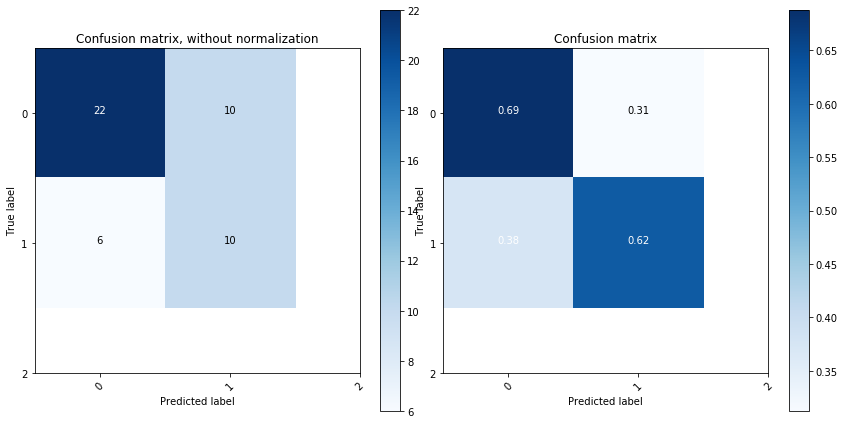

In [251]:
eval_plot(response_df['avg_embed_sim'], response_df['true_label'])

Confusion matrix, without normalization
[[19 13]
 [ 2 14]]
Normalized confusion matrix
[[0.59375 0.40625]
 [0.125   0.875  ]]


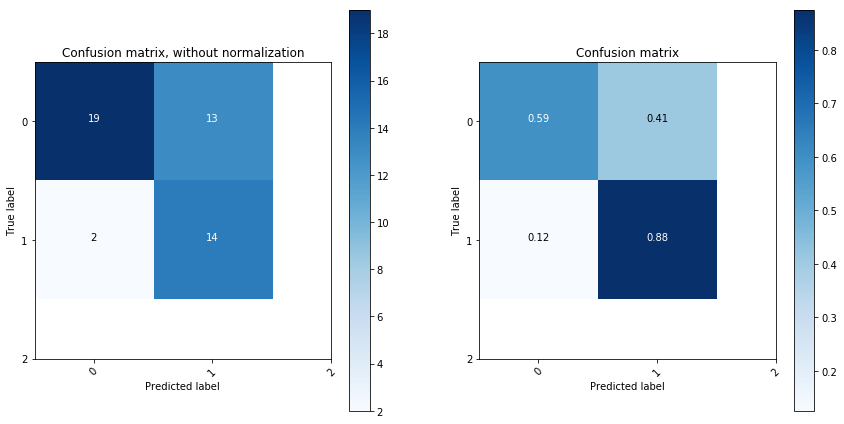

In [77]:
eval_plot(response_df['idf_embed_sim'], response_df['true_label'])

Confusion matrix, without normalization
[[22 10]
 [ 4 12]]
Normalized confusion matrix
[[0.6875 0.3125]
 [0.25   0.75  ]]


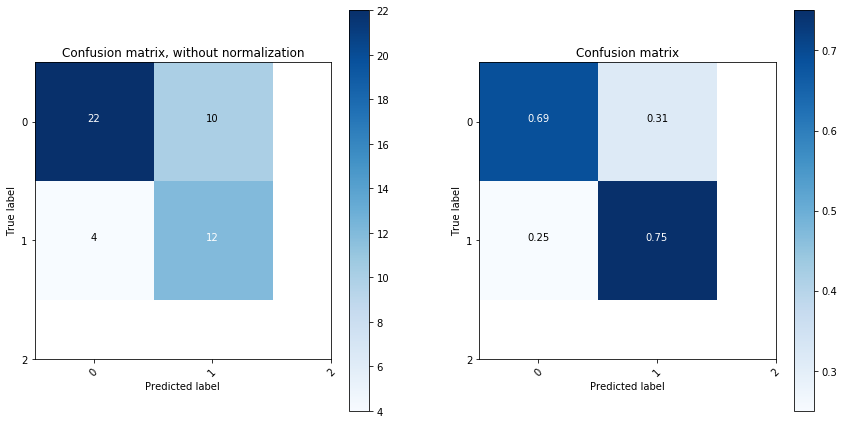

In [78]:
eval_plot(response_df['net_sim'], response_df['true_label'])